In [104]:
%cd /Users/kimmonica/Documents/Smart_CCTV/LSTM

from basic_preprocessing import *
from deeplearning_check import *
from video_info import *
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import os

gpu_check()
set_global_determinism(seed=SEED)

/Users/kimmonica/Documents/Smart_CCTV/LSTM
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3995480733113319671
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 10253625956303766852
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]
tf 2.9.2
keras 2.9.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


2022-10-17 23:43:22.334645: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-17 23:43:22.334670: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [105]:
np.__version__

'1.22.4'

In [106]:
DATA_PATH = os.path.join('/Users/kimmonica/Documents/Smart_CCTV/dataset2/')
actions = np.array(['fall', 'left'])

In [107]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'fall': 0, 'left': 1}

In [108]:
sequences, labels = [], []
for action in actions:
    for sequence in range(160):
        window = []
        for frame_num in range(400):
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            except:
                pass
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(320, 400, 1662)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1337)

In [ ]:

y_test.shape

(32, 2)

### MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model

In [ ]:
import numpy as np

In [ ]:
np.__version__

'1.22.4'

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(400,1662)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
res = [.8, 0.3]

In [ ]:
actions[np.argmax(res)]

'fall'

In [ ]:
checkpoint_path = "check_point/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

es = EarlyStopping(patience=20)
mc = ModelCheckpoint(filepath=checkpoint_path,
            monitor='loss', 
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1)
rlr = ReduceLROnPlateau(factor=0.1, patience=5)
csvlogger = CSVLogger("file_name.log")

In [ ]:
history = model.fit(X_train, y_train, batch_size= 16, validation_data=(X_test,y_test), epochs=30, callbacks=[mc, rlr, csvlogger])

Epoch 1/30


2022-10-17 23:25:50.808725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-17 23:25:51.014413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-17 23:25:51.933443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 0.6454 - categorical_accuracy: 0.6146

2022-10-17 23:25:56.816349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-17 23:25:56.902621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: loss improved from inf to 0.64537, saving model to check_point/cp.ckpt
18/18 [==============================] - 8s 191ms/step - loss: 0.6454 - categorical_accuracy: 0.6146 - val_loss: 0.5752 - val_categorical_accuracy: 0.6562 - lr: 0.0010
Epoch 2/30
18/18 [==============================] - ETA: 0s - loss: 0.5642 - categorical_accuracy: 0.6979
Epoch 2: loss improved from 0.64537 to 0.56418, saving model to check_point/cp.ckpt
18/18 [==============================] - 2s 123ms/step - loss: 0.5642 - categorical_accuracy: 0.6979 - val_loss: 0.7276 - val_categorical_accuracy: 0.5625 - lr: 0.0010
Epoch 3/30
18/18 [==============================] - ETA: 0s - loss: 0.5343 - categorical_accuracy: 0.7083
Epoch 3: loss improved from 0.56418 to 0.53435, saving model to check_point/cp.ckpt
18/18 [==============================] - 2s 120ms/step - loss: 0.5343 - categorical_accuracy: 0.7083 - val_loss: 0.5310 - val_categorical_accuracy: 0.6250 - lr: 0.0010
Epoch 4/30
18/18 [=================

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               705200    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 715,502
Trainable params: 715,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


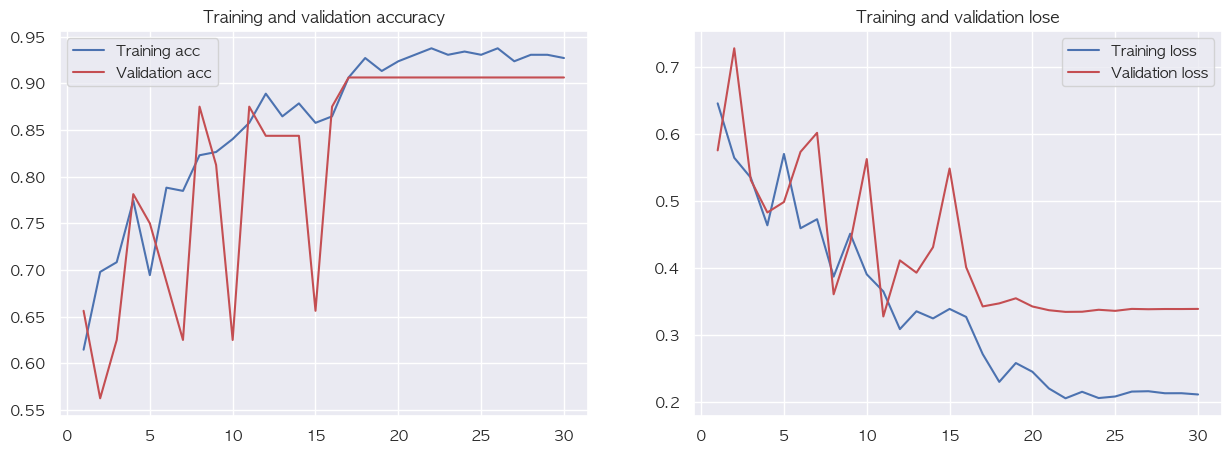

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
    
    

fig = plt.figure()
fig.set_size_inches(15, 5)

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label ='Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
fig.add_subplot(1, 2, 2) 
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and validation lose')
plt.legend()

plt.show()

### Predictions

In [ ]:
res = model.predict(X_test)

1/1 [==============================] - 0s 136ms/step


In [ ]:
actions[np.argmax(res[0])]

'left'

In [ ]:
actions[np.argmax(y_test[0])]

'left'

### Save Weights

In [ ]:
model.save('best_fall_left.h5')

### Acc

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [ ]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 136ms/step


In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[18,  2],
        [ 1, 11]],

       [[11,  1],
        [ 2, 18]]])

In [ ]:
con_test = confusion_matrix(ytrue, yhat)
con_test

array([[11,  1],
       [ 2, 18]])

In [ ]:
report =classification_report(ytrue, yhat)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.95      0.90      0.92        20

    accuracy                           0.91        32
   macro avg       0.90      0.91      0.90        32
weighted avg       0.91      0.91      0.91        32



In [ ]:
accuracy_score(ytrue, yhat)

0.90625